In [3]:
!pip install pandas

NaN check:
Story                    0
Link                     8
Fraud?                   8
Example Google Query    22
dtype: int64
Question: Is this information real?
Answer: Elon Musk investment scam
Predicted Label: FAKE

Question: Is this information real?
Answer: fake robo-call
Predicted Label: FAKE

Question: Is this information real?
Answer: Twitter suspended Navalny
Predicted Label: FAKE

Question: Is this information real?
Answer: Trump’s wild comments
Predicted Label: FAKE

Question: Is this information real?
Answer: Canada to stabilize growth and decrease number of new international students
Predicted Label: FAKE

Question: Is this information real?
Answer: AI
Predicted Label: FAKE

Question: Is this information real?
Answer: The most common scams affecting Canadians in 2024
Predicted Label: FAKE

Question: Is this information real?
Answer: Trump was fined $355 million and barred from his NY business temporarily.
Predicted Label: FAKE

Question: Is this information real?
Ans

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'REAL') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Confusion matrix, without normalization
[[0 0 1 0]
 [0 0 4 1]
 [0 0 1 0]
 [0 0 3 0]]
Confusion matrix, without normalization
[[0 0 1 0]
 [0 0 4 1]
 [0 0 1 0]
 [0 0 3 0]]
Passive Aggressive accuracy with TF-IDF Vectors: 0.200
Jaccard Similarity with TF-IDF Vectors: 0.114
Confusion matrix, without normalization


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'REAL') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


[[1 0 0 0]
 [3 0 0 2]
 [0 0 1 0]
 [3 0 0 0]]


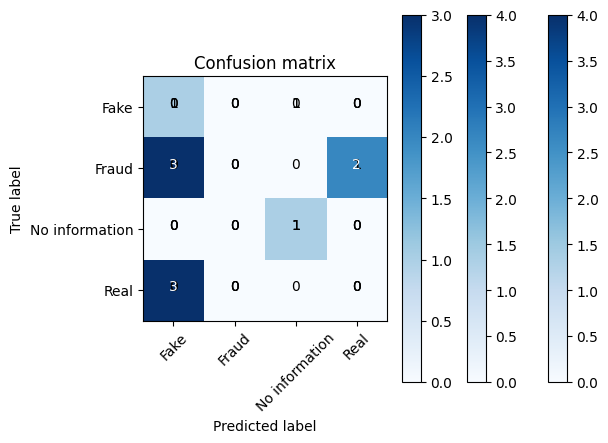

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from transformers import pipeline
from matplotlib import pyplot as plt
import itertools
import numpy as np

# Importing dataset using pandas dataframe
df = pd.read_csv("/content/Fraud_and_real_dataset_(new) - Sheet1.csv")  # Adjust the file path

# Set index
df = df.set_index("Id")

# Handle NaN values in the 'Story' column by filling them with a placeholder string
df['Story'].fillna('No information', inplace=True)



# Check for NaN values in the dataset
# Check for NaN values in the dataset
nan_check = df.isnull().sum()
print("NaN check:")
print(nan_check)

# Handle NaN values in the entire dataframe by filling them with a placeholder string
df.fillna('No information', inplace=True)

# Separate the labels and set up training and test datasets
y = df['Fraud?']
df.drop("Fraud?", axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df['Story'], y, test_size=0.33, random_state=53)



from transformers import pipeline

# Load RoBERTa question answering model
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2", tokenizer="deepset/roberta-base-squad2")

def classify_statement(statement):
    # Replace this with your actual classification logic
    if "real" in statement.lower():
        return "REAL"
    else:
        return "FAKE"

# Iterate through the dataset and ask questions
for index, row in df.iterrows():
    context = row['Story']
    question = "Is this information real?"

    # Get answer
    answer = qa_pipeline(question=question, context=context)

    # Determine if the answer is real or fake based on your classification model
    predicted_label = classify_statement(answer["answer"])

    print(f"Question: {question}")
    print(f"Answer: {answer['answer']}")
    print(f"Predicted Label: {predicted_label}\n")








# Get unique labels from y_test dynamically
unique_labels = np.unique(y_test)

# Naive Bayes classifier for Multinomial model using Count Vectors
clf_count = MultinomialNB()
clf_count.fit(count_train, y_train)
pred_count = clf_count.predict(count_test)
score_count = metrics.accuracy_score(y_test, pred_count)
jaccard_count = metrics.jaccard_score(y_test, pred_count, pos_label='REAL', average='weighted')  # Change 'binary' to 'weighted'
print("Naive Bayes accuracy with Count Vectors: %0.3f" % score_count)
print("Jaccard Similarity with Count Vectors: %0.3f" % jaccard_count)

# Use dynamically retrieved unique labels
cm_count = metrics.confusion_matrix(y_test, pred_count, labels=unique_labels)
plot_confusion_matrix(cm_count, classes=unique_labels)
print(cm_count)


# If 'FAKE' and 'REAL' are not present in y_test, adjust labels accordingly
cm_count = metrics.confusion_matrix(y_test, pred_count, labels=np.unique(y_test))
plot_confusion_matrix(cm_count, classes=np.unique(y_test))
print(cm_count)


# Applying Passive Aggressive Classifier with TF-IDF Vectors
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred_linear = linear_clf.predict(tfidf_test)
score_linear = metrics.accuracy_score(y_test, pred_linear)
jaccard_linear = metrics.jaccard_score(y_test, pred_linear, pos_label='REAL', average='weighted')  # Change 'binary' to 'weighted'
print("Passive Aggressive accuracy with TF-IDF Vectors: %0.3f" % score_linear)
print("Jaccard Similarity with TF-IDF Vectors: %0.3f" % jaccard_linear)
cm_linear = metrics.confusion_matrix(y_test, pred_linear, labels=unique_labels)
plot_confusion_matrix(cm_linear, classes=unique_labels)
print(cm_linear)
